<a href="https://colab.research.google.com/github/abidur0177/Digital-Signal-Processing/blob/main/Digital_Vs_Analog_Transmission_Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analog vs Digital Transmission**

In this notebook we will explore the potential advantages of digital transmission over analog transmission. We will consider the case of transmission over a long (e.g. transoceanic) cable in which several repeaters are used to compensate for the attenuation introduced by the transmission.

Remember that if each cable segment introduces an attenuation of 1/G, we can recover the original amplitude by boosting the signal with a repeater with gain GG. However, if the signal has accumulated additive noise, the noise will be amplified as well so that, after N repeaters, the noise will have been amplified N times:

$$ \hat{x}_N(t) = x(t) + NG\sigma(t) $$

If we use a digital signal, on the other hand, we can threshold the signal after each repeater and virtually eliminate the noise at each stage, so that even after several repeaters the trasmission is still noise-free.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile

In [2]:
plt.rcParams["figure.figsize"] = (10,4)

Now read the audio file and play this

In [3]:
rate, speech = wavfile.read("/content/speech.wav")
print(type(speech), speech.dtype, speech.shape)

<class 'numpy.ndarray'> int16 (496512, 2)


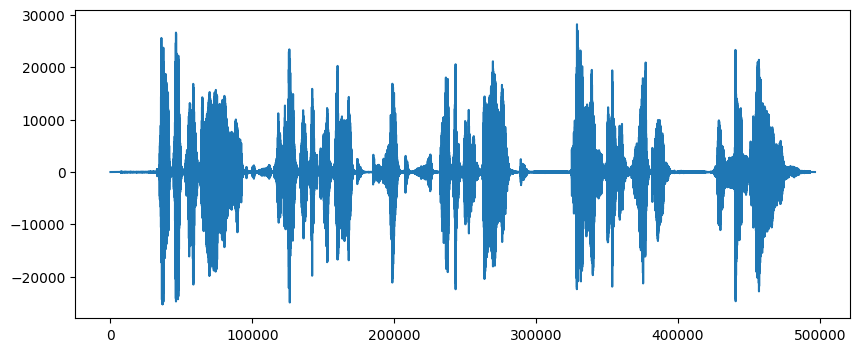

In [4]:
# The wavfile contains two channels so first extract any one of this and then process the next steps
s = speech[:,1]
plt.plot(s);
IPython.display.Audio(s, rate=rate)

## The "Analog" and "Digital" Signals ##

We will now create two version of the audio signal, an "analog" version and a "digital" version. Obviously the analog version is just a simulation, since we're using a digital computer; we will assume that, by using floating point values, we're in fact close enough to infinite precision. In the digital version of the signal, on the other hand, the audio samples will only take integer values between -100 and +100 (i.e. we will use approximately 8 bits per audio sample).

In [5]:
# Norm calculation and analog signal generation
norm = 1.0/(max(np.absolute([min(s), max(s)])))
sA = 100.0 * s * norm

# Digital version
sD = np.round(sA)

As quantization introduce initial loss for digital conversion, lets have a look at the quantization error

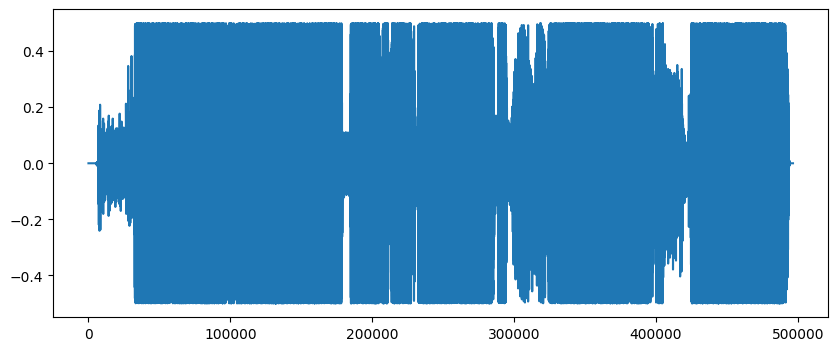

In [6]:
q_error = sA - sD
plt.plot(q_error);

In [7]:
# Define the function to calculate the SNR
def SNR(original, noisy):
  # Calculate the power of the noise = original - noisy
  p_noise = np.linalg.norm(original-noisy)
  # Calculate the power of the signal
  p_sig = np.linalg.norm(original)

  # Return the SNR in dB
  return 10 * np.log10(p_sig/p_noise)

# Print the SNR for the analog to digital conversion
print("SNR = %f dB" % SNR(sA,sD))

SNR = 16.909950 dB


In [8]:
# Lets hear the 17 dB difference
# Original signal
print('Original Signal')
IPython.display.Audio(sA, rate=rate)

Original Signal


In [9]:
# Noisy signal = digital version
print('Noisy Signal')
IPython.display.Audio(sD, rate=rate)

Noisy Signal


## Transmission ##

Let's now define a function that represents the net effect of transmitting audio over a cable segment terminated by a repeater:
* the signal is attenuated
* the signal is accumulates additive noise as it propagates through the cable
* the signal is amplified to the original amplitude by the repeater

In [10]:
# Define the function for signal attenuation, noise addition and gain compensation
def repeater(x, noise_amplitude, attenuation):
  # Attenuate the signal
  x = x * attenuation
  # Create uniform random noise
  noise = np.random.uniform(-noise_amplitude, noise_amplitude, len(x))
  # Add the noise to the attenuated signal
  x = x + noise
  # Gain compensation by the repeater
  x = x/attenuation

  # Return the amplified signal after the repeater
  return x

we can use the repeater for both analog and digital signals. Transmission of the analog signal is simply a sequence of repeaters:

In [11]:
# Define a function for the analog transmission system
def analog_tx(x, num_repeaters, noise_amplitude, attenuation):
  for i in range(0, num_repeaters):
    x = repeater(x, noise_amplitude, attenuation)

  return x

In [12]:
# Define a function for the digital transmission system
def digital_tx(x, num_repeaters, noise_amplitude, attenuation):
  for i in range(0, num_repeaters):
    x = np.round(repeater(x, noise_amplitude, attenuation))

  return x

Lets compare the transmission schemes

In [13]:
num_repeaters = 70
noise_amplitude = 0.15
attenuation = 0.3

# Output of analog transmission
yA = analog_tx(sA, num_repeaters, noise_amplitude, attenuation)
print("Analog transmission: SNR = %f "% SNR(yA, sA))

# Output of digital transmission
yD = digital_tx(sD, num_repeaters, noise_amplitude, attenuation)
print("Digital transmission: SNR = %f "% SNR(yD, sA))



Analog transmission: SNR = 7.222957 
Digital transmission: SNR = 16.910799 


The SNR after digital transmission has not changed! Now the difference between audio clips should be easy to hear:

In [14]:
# Analog transmission output
IPython.display.Audio(yA, rate=rate)

In [15]:
# Digital transmission output
IPython.display.Audio(yD, rate=rate)

 If the noise amplitude exceeds a certain value, digital transmission degrades even less gracefully than analog transmission:

In [16]:
noise_amplitude = 0.2

# Output of analog transmission
yA = analog_tx(sA, num_repeaters, noise_amplitude, attenuation)
print("Analog transmission: SNR = %f "% SNR(yA, sA))

# Output of digital transmission
yD = digital_tx(sD, num_repeaters, noise_amplitude, attenuation)
print("Digital transmission: SNR = %f "% SNR(yD, sA))


Analog transmission: SNR = 6.037946 
Digital transmission: SNR = 4.979120 


In [17]:
# Analog transmission output
IPython.display.Audio(yA, rate=rate)

In [18]:
# Digital transmission output
IPython.display.Audio(yD, rate=rate)